In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
#import tgb as tgb

In [7]:
# from tgb.nodeproppred.dataset import NodePropPredDataset

# name = "tgbn-genre"

# dataset = NodePropPredDataset(name=name, root="datasets", preprocess=True)

# data = dataset.full_data

In [19]:
# data['edge_feat']= [x for xs in data['edge_feat'] for x in xs]
# df= pd.DataFrame.from_dict(data, orient='columns')

In [65]:
df= pd.read_csv("../../Project/data/tgbn-genre_node_labels.csv")

In [42]:
df.head()

,ts,user_id,genre,weight
0,1108443600,user_000054,chillout,0.015835
1,1108443600,user_000054,female vocalist,0.015330
2,1108443600,user_000054,downtempo,0.008128
3,1108443600,user_000054,electronic,0.072162
4,1108443600,user_000054,reggae,0.021465


In [66]:
#time to Y-M-D, h-m-s format
#user_id to ddd number

df['ts']= pd.to_datetime(df['ts'], unit= 's') # timestamp to datetime
df['ts'] = pd.to_datetime(df['ts'].dt.strftime('%Y-%m-%d')) # dont need time because the timestamp is reset to the beginning of day in order to calculate the frequency vector label
df['user_id']=df['user_id'].str.slice(5).astype('Int64') #convert user_id to integers

In [67]:
df.head()

,ts,user_id,genre,weight
0,2005-02-15,54,chillout,0.015835
1,2005-02-15,54,female vocalist,0.015330
2,2005-02-15,54,downtempo,0.008128
3,2005-02-15,54,electronic,0.072162
4,2005-02-15,54,reggae,0.021465


In [68]:
genres = df.genre.unique()
index_genres = {ele: pos for pos, ele in enumerate(genres)}

In [69]:
#genre to a unique number
df['genre_id'] = [index_genres[genre] for genre in df.genre]

In [70]:
df.sample(10)

,ts,user_id,genre,weight,genre_id
1021196,2007-05-08,703,pop,0.020000,20
1770089,2008-04-24,591,80s,0.630252,18
2492519,2009-02-06,791,Mariah Carey,0.002208,425
1444770,2007-11-30,132,piano,0.229426,63
2131021,2008-09-23,41,80s,0.048293,18
699597,2006-12-01,594,melancholic,0.015866,243
2093150,2008-09-08,691,experimental,0.016953,38
1879792,2008-06-10,825,alternative rock,0.021720,13
2400183,2009-01-05,717,metal,0.002770,30
2038522,2008-08-17,934,singer-songwriter,0.022705,47


In [71]:
df.user_id.nunique()

974

In [72]:
df.genre_id.nunique()

513

<Axes: >

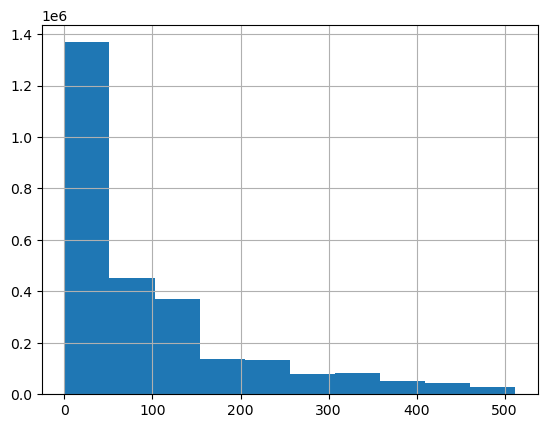

In [73]:
df['genre_id'].hist()

<Axes: >

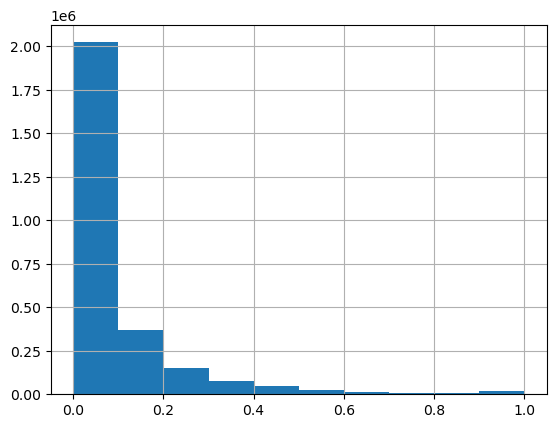

In [74]:
df['weight'].hist()

In [75]:
df_user = df[df['user_id'] == 937]

In [76]:
df_user

,ts,user_id,genre,weight,genre_id
1125404,2007-07-01,937,80s,0.077179,18
1125405,2007-07-01,937,pop,0.061662,20
1125406,2007-07-01,937,House,0.004274,71
1125407,2007-07-01,937,lounge,0.003804,8
1125408,2007-07-01,937,deep house,0.002778,245
...,...,...,...,...,...
1977161,2008-07-21,937,alternative,0.060619,22
1977162,2008-07-21,937,beautiful,0.069052,43
1977163,2008-07-21,937,Coldplay,0.019358,79
1979381,2008-07-22,937,electronic,0.309160,3


In [77]:
times = df_user.ts.unique()

In [79]:
df_user[df_user['ts'] == times[0]].weight.sum()

0.9999999999999976

In [89]:
for row in df_user[df_user['ts'] == times[0]].iterrows():
    print(row[1].genre_id)

18
20
71
8
245
3
275
6
9
21
33
407
1
144
253
197
22
16
13
160
12
17
35
57
107
83
92
30
339
89
101
232
58
104
145
316
14
121
31
54
329
38
187
154
270
141
260
46
258
120
47


In [100]:
matrix_user = np.zeros ((df_user.ts.nunique(),df.genre_id.nunique()))
for i,t in enumerate(df_user.ts.unique()):
    table =  df_user[df_user['ts'] == t]
    for row in table.iterrows():
        matrix_user[i,row[1].genre_id] = row[1].weight

In [99]:
from sklearn.manifold import TSNE, MDS

In [103]:
tsne = TSNE(metric ='l1')

In [108]:
embedding = tsne.fit_transform(matrix_user)

In [113]:
embedding[0]

array([-0.5827804 , -0.06531932], dtype=float32)

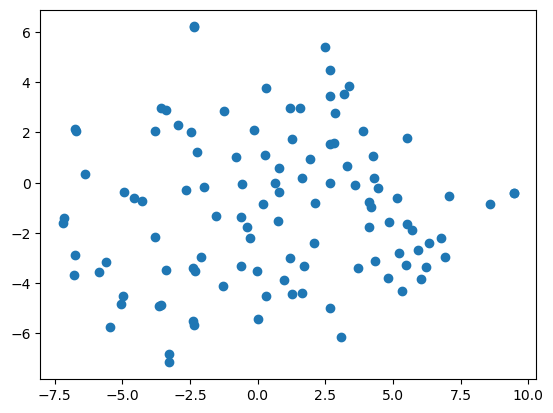

In [114]:
plt.scatter(embedding[:,0], embedding[:,1])